### Reading simulated data file and original census file

In [3]:
import time
import math
import pandas as pd
#print(pd.__version__)
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp #sparse algebra
import scipy.special as sps
import scipy.stats as stats
from collections import Counter

import random  # cllm: Needed for the time being to create (random) companies

In [142]:
# Reading dataframe from SummaryInfo file
file_simulation = "SummaryInfo4Feb21.csv" # 1st simulation

SummaryInfo = pd.read_csv(file_simulation,sep = ';')
dataShapeSummaryInfo = SummaryInfo.shape  
dataColumnsSummaryInfo = SummaryInfo.columns
#print("filterWork: ",filterWork) = len(SummaryInfo)

print("")
print("File", file_simulation, "containing", numEntriesSummaryInfo, "number of entries read")
print("")
print("Shape:", dataShapeSummaryInfo)
print("")
print("Columns:", dataColumnsSummaryInfo)
print("")



File SummaryInfo4Feb21.csv containing 5527233 number of entries read

Shape: (5527233, 8)

Columns: Index(['Unnamed: 0', 'exposed', 'lambda_home', 'lambda_work', 'lambda_play',
       'diagnosed', 'exposedTic', 'diagnosedTic'],
      dtype='object')



In [113]:
# Reading file with simulated population including residences
fileNewWorld = "NewWorld.csv" # File with individual (5527233 people, including residences) data created with CreateWorld.ipynb

dfNewWorld = pd.read_csv(fileNewWorld)
dataShape = dfNewWorld.shape  
dataColumns = dfNewWorld.columns
numPeople = len(dfNewWorld)

print("")
print("File", fileNewWorld, "containing", numPeople, "people read")
print("")
print("Shape:", dataShape)
print("")
print("Columns:", dataColumns)
print("")


File NewWorld.csv containing 5527233 people read

Shape: (5527233, 9)

Columns: Index(['HomeID', 'Age', 'Gender', 'HomeRegion', 'HomeOccupancy', 'WorkRegion',
       'companyID', 'SchoolRegion', 'schoolID'],
      dtype='object')



#### following classes are examples of histograms

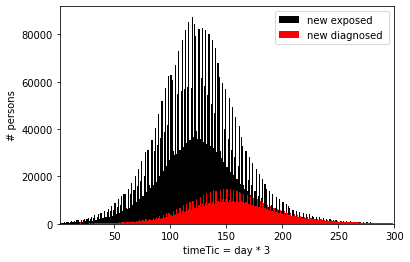

In [143]:
# plot time profile of newly exposed ( or immmediately infectious)
#print('place of newly exposed = ',tic2place(SummaryInfo['exposedTic'],Itimeprofile,Itimeprofile_galery))#

binsTic =  range(1, 300, 1)

fig, ax = plt.subplots()

#plt.ylim(0.,100000,)
plt.xlim(1.,300.)
plt.hist(SummaryInfo['exposedTic'], bins=binsTic, label="new exposed ", color = "black")
plt.hist(SummaryInfo['diagnosedTic'], bins=binsTic, label="new diagnosed ", color = "red")
plt.xlabel("timeTic = day * 3")
plt.ylabel("# persons")
plt.legend()
plt.show()


range(1, 300, 3)


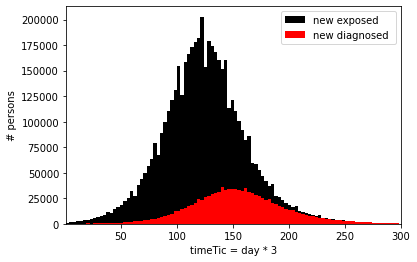

In [150]:
# plot time profile of newly exposed ( or immmediately infectious)
#print('place of newly exposed = ',tic2place(SummaryInfo['exposedTic'],Itimeprofile,Itimeprofile_galery))#

binsTic =  range(1, 300, 3)

fig, ax = plt.subplots()

#plt.ylim(0.,250000,)
plt.xlim(1.,300.)
plt.hist(SummaryInfo['exposedTic'], bins=binsTic, label="new exposed ", color = "black")
plt.hist(SummaryInfo['diagnosedTic'], bins=binsTic, label="new diagnosed ", color = "red")
plt.xlabel("timeTic = day * 3")
plt.ylabel("# persons")
plt.legend()
plt.show()


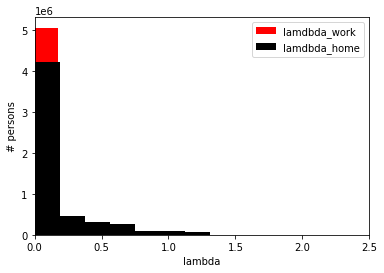

In [146]:
# plot time profile of newly exposed ( or immmediately infectious)
#print('place of newly exposed = ',tic2place(SummaryInfo['exposedTic'],Itimeprofile,Itimeprofile_galery))#

fig, ax = plt.subplots()

#plt.ylim(0.,100000,)
plt.xlim(0.,2.5)
plt.hist(SummaryInfo['lambda_work'], label="lamdbda_work", color = "red")
plt.hist(SummaryInfo['lambda_home'], label="lamdbda_home", color = "black")
#plt.hist(SummaryInfo['lambda_play'], label="lamdbda_play", color = "blue")
plt.xlabel("lambda")
plt.ylabel("# persons")
plt.legend()
plt.show()


Number of people contagiated at home =  1434170
Number of people contagiated at work =  946465
Number of people contagiated at play =  2664024


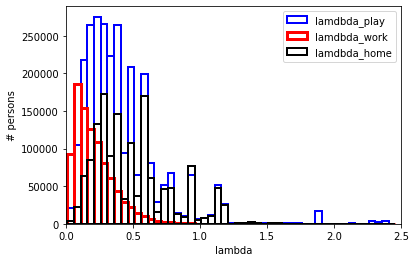

In [164]:
# plot time profile of newly exposed ( or immmediately infectious)
#print('place of newly exposed = ',tic2place(SummaryInfo['exposedTic'],Itimeprofile,Itimeprofile_galery))#

print('Number of people contagiated at home = ',np.sum(SummaryInfo['lambda_home']>0))
print('Number of people contagiated at work = ',np.sum(SummaryInfo['lambda_work']>0))
print('Number of people contagiated at play = ',np.sum(SummaryInfo['lambda_play']>0))

binsLambda = np.arange(0.01, 2.51, 0.05)
#print(binsLambda)


fig, ax = plt.subplots()

#plt.ylim(0.,100000,)
plt.xlim(0.,2.5)
plt.hist(SummaryInfo['lambda_play'], bins = binsLambda, label="lamdbda_play", edgecolor = "blue", linewidth=2, fill=False)
plt.hist(SummaryInfo['lambda_work'], bins = binsLambda, label="lamdbda_work", edgecolor = "red", linewidth=3, fill=False)
plt.hist(SummaryInfo['lambda_home'], bins = binsLambda, label="lamdbda_home", edgecolor = "black", linewidth=2, fill=False)

plt.xlabel("lambda")
plt.ylabel("# persons")
plt.legend()
plt.show()


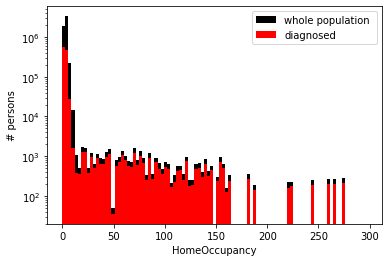

In [154]:
# plot time profile of newly exposed ( or immmediately infectious)
#print('place of newly exposed = ',tic2place(SummaryInfo['exposedTic'],Itimeprofile,Itimeprofile_galery))#

occupancyBins =  range(0, 300, 3)

fig, ax = plt.subplots()

#plt.ylim(0.,100000,)
#plt.xlim(0.,2.)
plt.hist(dfNewWorld['HomeOccupancy'], bins = occupancyBins, label="whole population ", color = "black")
plt.hist(dfNewWorld.where(SummaryInfo['diagnosed']>0)['HomeOccupancy'], bins = occupancyBins, label="diagnosed", color = "red")
plt.xlabel("HomeOccupancy")
plt.ylabel("# persons")
plt.yscale('log')
plt.legend()
plt.show()


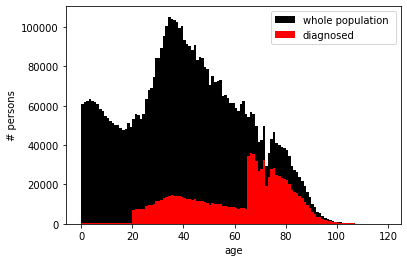

In [133]:
# plot time profile of newly exposed ( or immmediately infectious)
#print('place of newly exposed = ',tic2place(SummaryInfo['exposedTic'],Itimeprofile,Itimeprofile_galery))#

ageBins =  range(0, 120, 1)

fig, ax = plt.subplots()

#plt.ylim(0.,100000,)
#plt.xlim(0.,2.)
plt.hist(dfNewWorld['Age'], bins = ageBins, label="whole population ", color = "black")
plt.hist(dfNewWorld.where(SummaryInfo['diagnosed']>0)['Age'], bins = ageBins, label="diagnosed", color = "red")
plt.xlabel("age")
plt.ylabel("# persons")
plt.legend()
plt.show()


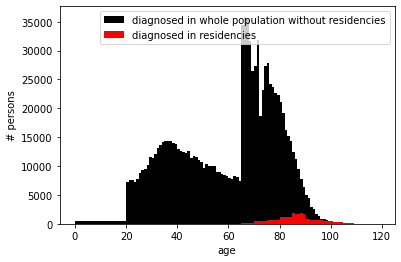

In [141]:
# plot time profile of newly exposed ( or immmediately infectious)
#print('place of newly exposed = ',tic2place(SummaryInfo['exposedTic'],Itimeprofile,Itimeprofile_galery))#

ageBins =  range(0, 120, 1)

fig, ax = plt.subplots()

#plt.ylim(0.,100000,)
#plt.xlim(0.,2.)
filterResidencies=dfNewWorld['HomeID']<1000
filterDiagnosed=SummaryInfo['diagnosed']>0
plt.hist(dfNewWorld.where(~filterResidencies&filterDiagnosed)['Age'], bins = ageBins, \
             label="diagnosed in whole population without residencies", color = "black")
plt.hist(dfNewWorld.where(filterResidencies&filterDiagnosed)['Age'], bins = ageBins, \
             label="diagnosed in residencies", color = "red")
plt.xlabel("age")
plt.ylabel("# persons")
plt.legend()
plt.show()
